In [213]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
import sys
sys.path.append("..")
from src.plot import *
import numpy as np

In [140]:
assignments = np.load("../results/10000/assignments.npy")
assignments = assignments[:-1,:]

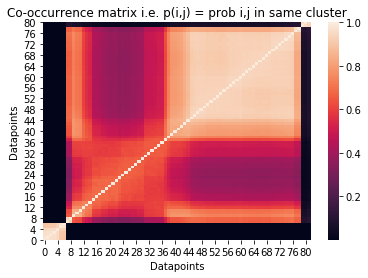

In [220]:
plot_co_occurrence_matrix(assignments)

In [ ]:
plot_cluster_size_hist(assignments)

In [188]:
import pickle
chain = pickle.load(open("../results/1000/galaxy_N_1000_chain_iter.pkl", "rb"))

In [195]:
mu = chain["mu"]
sigma = chain["sigma"]
weights = chain["weights"]

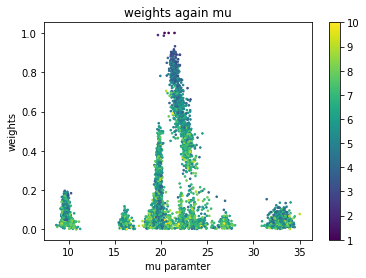

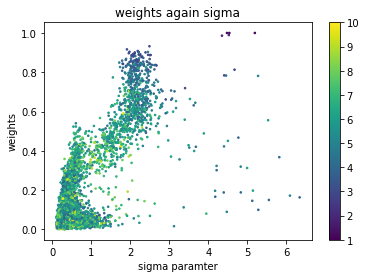

In [219]:
plot_cluster_params(mu, sigma, weights)

In [ ]:

###
#compute posterior predictive distributions - weights (w) vs. means (mu) scater plot
#pdf('DPmixtureGscatterMUW.pdf',8,4)
L=200
x=seq(0,40,length.out=L)
den=matrix(0,max(d)-min(d)+1,L)
plot(c(),c(),xlim=c(0,50),ylim=c(0,1),xlab='MU, colored by number of clusters in state',ylab='W component weight')
for (k in 1:Nsamp) { 
  w=TH[[k]]$w; mu=TH[[k]]$mu; sigma=TH[[k]]$sigma
  ind=d[k]-min(d)+1
  points(mu,w,pch='.',col=ind)
  den[ind,]=den[ind,]+exp(apply(t(x),2,log.lkd,w,mu,sigma))
}
cden=den/as.vector(table(d))
mden=apply(den,2,sum)/Nsamp
#dev.off()